# **Classification with Fully Connected Neural Networks**

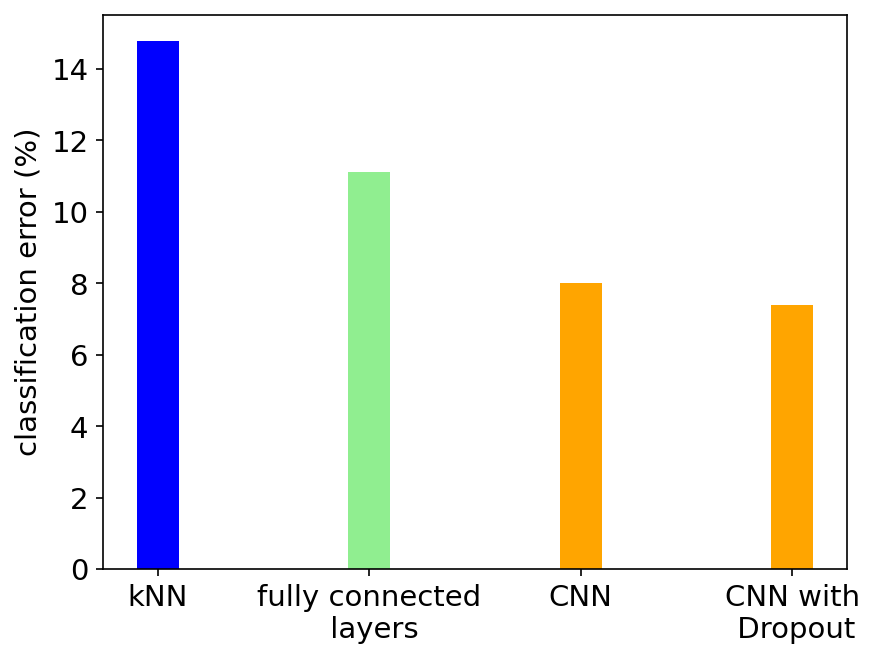

In [1]:
import matplotlib.pyplot as plt
import numpy as np

s=14

x = np.array(["kNN", "fully connected\n layers", "CNN", "CNN with\n Dropout"])
y = np.array([14.78, 11.12, 8.02,7.38])
c = ['blue', 'lightgreen', 'orange', 'orange']

plt.rc ('font', size = s) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = s) # Schriftgröße des Titels
plt.rc ('axes', labelsize = s) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = s) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = s) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = s)



plt.figure(dpi=150)
plt.bar(x,y, color=c,align='center', width=0.2)
plt.ylabel("classification error (%)")
plt.show()

**Import data & train-/val-/testsplit**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
from sklearn.model_selection import train_test_split

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

test_images, val_images, test_labels, val_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)

**Define Fully Connected Neural Network**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

#Zwei Hidden layers mit 128 und 32 Neuronen
model = keras.Sequential([
 layers.Dense(128, activation="relu"),
 layers.Dense(32, activation="relu"),
 layers.Dense(10, activation="softmax")
])

**Compile model**

In [ ]:
model.compile(optimizer="RMSprop",
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Training**

In [ ]:
history = model.fit(train_images, train_labels, epochs=30, batch_size=128, validation_data = (val_images, val_labels))

Epoch 1/30
469/469 [==============================] - 4s 7ms/step - loss: 0.5903 - accuracy: 0.7922 - val_loss: 0.4591 - val_accuracy: 0.8386
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.4100 - accuracy: 0.8511 - val_loss: 0.4106 - val_accuracy: 0.8474
Epoch 3/30
469/469 [==============================] - 4s 8ms/step - loss: 0.3651 - accuracy: 0.8674 - val_loss: 0.3955 - val_accuracy: 0.8596
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 0.3374 - accuracy: 0.8767 - val_loss: 0.3856 - val_accuracy: 0.8622
Epoch 5/30
469/469 [==============================] - 3s 7ms/step - loss: 0.3193 - accuracy: 0.8824 - val_loss: 0.3673 - val_accuracy: 0.8690
Epoch 6/30
469/469 [==============================] - 5s 10ms/step - loss: 0.3012 - accuracy: 0.8896 - val_loss: 0.3830 - val_accuracy: 0.8720
Epoch 7/30
469/469 [==============================] - 6s 12ms/step - loss: 0.2902 - accuracy: 0.8931 - val_loss: 0.3361 - val_accuracy: 0.8776
Epoc

**Plot loss:**

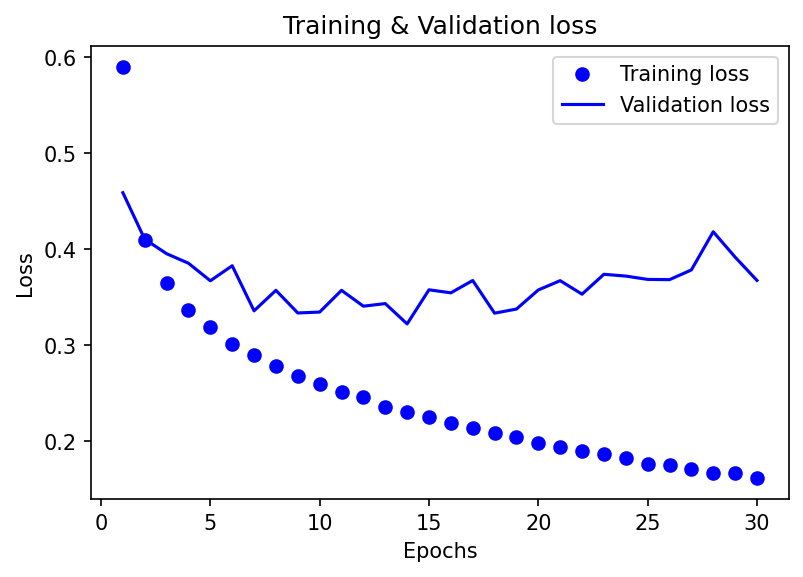

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.figure(dpi=150)
plt.plot(epochs, loss_values,"bo", label ="Training loss")
plt.plot(epochs, val_loss_values, "b", label ="Validation loss")
plt.title("Training & Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


**Plot accuracy**

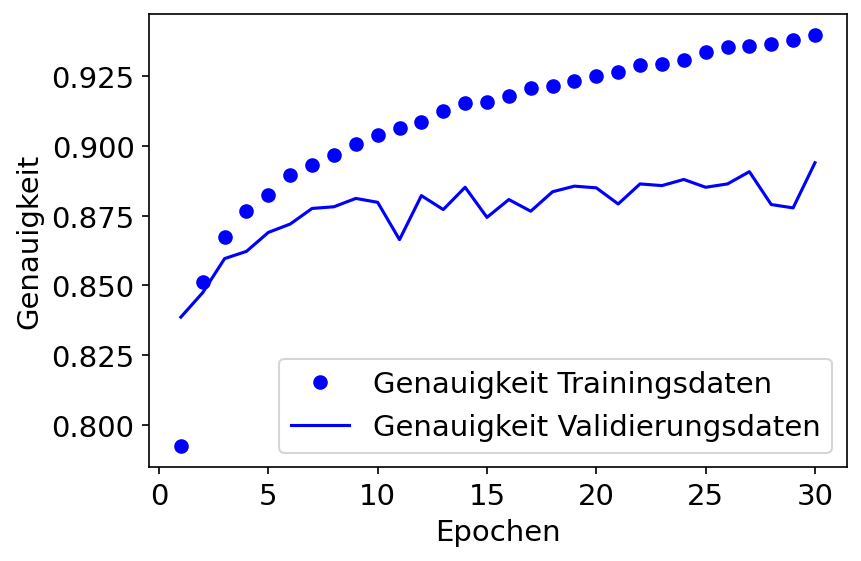

In [ ]:
import matplotlib.pyplot as plt

s=14
#plt.rcParams["figure.figsize"] = (10,6)
plt.figure(dpi=150)
plt.rc ('font', size = s) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = s) # Schriftgröße des Titels
plt.rc ('axes', labelsize = s) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = s) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = s) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = s)


history_dict = history.history

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc, "bo", label ="Genauigkeit Trainingsdaten")
plt.plot(epochs, val_acc, "b", label ="Genauigkeit Validierungsdaten")
#plt.title("Richtig klassifizierte Daten")
plt.xlabel("Epochen")
plt.ylabel("Genauigkeit")
plt.legend()
plt.show()

**Results**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test accuracy:", test_acc)

157/157 [==============================] - 1s 3ms/step - loss: 0.4023 - accuracy: 0.8888
test accuracy: 0.8888000249862671
